<a href="https://colab.research.google.com/github/MicrogRaNat33/Proyecto-DS---Garzon-Casis/blob/main/Desafio_AlgoritmoML_MVP_Pamela_Casis_Natalia_Garzon15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega realizada por: Pamela Casis y Natalia Garzón

Entrenando un algoritmo de Machine Learning
1.Regresion simple

2.Regresion multiple

Consigna
Utilizar una fuente de datos para resolver problemas de clasificación o regresión.

Realizar los procesos de Encoding, Feature Engineering y entrenamiento de un modelo de Machine Learning (Clasificación o Regresión)

El objetivo principal es construir un modelo de aprendizaje automático para predecir los ingresos de una nueva película teniendo en cuenta características como el presupuesto, las fechas de lanzamiento y los géneros. El rendimiento del modelado se evalúa en función de R Square.

El objetivo secundario es practicar habilidades como la manipulación de datos, la visualización de datos y el uso de bosque aleatorio, regresión lineal, regresor LightGBM.

##Cargando la información e Importando Librerías

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)

#Librerías para gráficas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import ast
import time
from urllib.request import urlopen
from PIL import Image
#Librería Sklearn (Modelo predictivo y Gráficas)
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn import model_selection # for splitting into train and test
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split, KFold
import sklearn.metrics as metrics
from sklearn import decomposition

print('Libraries imported..')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Libraries imported..


In [ ]:
!pip install eli5 -q



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 8.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
import eli5

## Cargamos y Leemos el Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#X = '/content/gdrive/MyDrive/Entregas_DS_Coderhouse_Garzon_Casis/13. Evaluando modelos de ML/movies_modificado.csv'
#X = '/content/gdrive/MyDrive/Entregas_DS_Coderhouse_Garzon_Casis/13. Evaluando modelos de ML/movie.csv'
X='/content/gdrive/MyDrive/PROYECTO_DS_CODERHOUSE 2022/Entregas_DS_Coderhouse_Garzon_Casis/13. Evaluando modelos de ML/movies_modificado.csv'
F='/content/gdrive/MyDrive/PROYECTO_DS_CODERHOUSE 2022/Entregas_DS_Coderhouse_Garzon_Casis/14_Desafio_EvaluacionML_Garzon_Casis/moviesF.csv'

In [ ]:
#Importacion de los datos
moviesf=pd.read_csv(F, sep = (',') )
moviesf.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,homepage,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,ganancias,imdb_id,popularity,vote_average,vote_count,year,release_date,overview
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,1970-01-01 00:00:00.000002009,936.0,7.9,1.78,33000,523505847.0,tt0499549,185.070892,7.2,12114.0,1970,10-12-2009,"In the 22nd century, a paraplegic Marine is di..."
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,1970-01-01 00:00:00.000002007,5000.0,7.1,2.35,0,9404152.0,tt0449088,31.363664,6.9,4627.0,1970,19-05-2007,"Captain Barbossa, long believed to be dead, ha..."
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,1970-01-01 00:00:00.000002015,393.0,6.8,2.35,85000,-44925825.0,tt2379713,24.926577,6.3,4552.0,1970,26-10-2015,A cryptic message from Bond’s past sends him o...
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,1970-01-01 00:00:00.000002012,23000.0,8.5,2.35,164000,198130642.0,tt1345836,20.582580,7.6,9263.0,1970,16-07-2012,Following the death of District Attorney Harve...
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,1970-01-01 00:00:00.000002012,632.0,6.6,2.35,24000,-190641321.0,tt0401729,14.670353,6.1,2170.0,1970,07-03-2012,"John Carter is a war-weary, former military ca..."


In [ ]:
#Importacion de los datos
movies1=pd.read_csv(X, sep = (';') )
movies1.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,ganancias,imdb_id,popularity,vote_average,vote_count,year
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,1970-01-01 00:00:00.000002009,936.0,7.9,1.78,33000,523505847.0,tt0499549,185.070892,7.2,12114.0,1970
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,1970-01-01 00:00:00.000002007,5000.0,7.1,2.35,0,9404152.0,tt0449088,31.363664,6.9,4627.0,1970
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,1970-01-01 00:00:00.000002015,393.0,6.8,2.35,85000,-44925825.0,tt2379713,24.926577,6.3,4552.0,1970
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,1970-01-01 00:00:00.000002012,23000.0,8.5,2.35,164000,198130642.0,tt1345836,20.582580,7.6,9263.0,1970
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,1970-01-01 00:00:00.000002012,632.0,6.6,2.35,24000,-190641321.0,tt0401729,14.670353,6.1,2170.0,1970


In [ ]:
movies1.shape

(4596, 34)

##Cambiamos el rotulo de la columna movie_title a title

In [ ]:
movies1 = movies1.rename(columns={'movie_title': 'title','movie_imdb_link': 'homepage'})
movies1

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,homepage,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,ganancias,imdb_id,popularity,vote_average,vote_count,year
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,7.605058e+08,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,2.370000e+08,1970-01-01 00:00:00.000002009,936.0,7.9,1.780000,33000,5.235058e+08,tt0499549,185.070892,7.2,12114.0,1970
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,3.094042e+08,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,3.000000e+08,1970-01-01 00:00:00.000002007,5000.0,7.1,2.350000,0,9.404152e+06,tt0449088,31.363664,6.9,4627.0,1970
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,2.000742e+08,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,2.450000e+08,1970-01-01 00:00:00.000002015,393.0,6.8,2.350000,85000,-4.492582e+07,tt2379713,24.926577,6.3,4552.0,1970
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,4.481306e+08,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,2.500000e+08,1970-01-01 00:00:00.000002012,23000.0,8.5,2.350000,164000,1.981306e+08,tt1345836,20.582580,7.6,9263.0,1970
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,7.305868e+07,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,2.637000e+08,1970-01-01 00:00:00.000002012,632.0,6.6,2.350000,24000,-1.906413e+08,tt0401729,14.670353,6.1,2170.0,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2.040920e+06,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130.0,Spanish,USA,R,7.000000e+03,1970-01-01 00:00:00.000001992,20.0,6.9,1.370000,0,2.033920e+06,tt0104815,9.972591,6.6,243.0,1970
4592,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4.584000e+03,Comedy|Drama,Kerry Bishé,Newlyweds,1338,690,Daniella Pineda,1.0,written and directed by cast member,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,14.0,English,USA,Not Rated,9.000000e+03,1970-01-01 00:00:00.000002011,205.0,6.4,2.222349,413,-4.416000e+03,tt1880418,1.090484,5.6,6.0,1970
4593,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,4.764451e+07,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,3.654749e+07,1970-01-01 00:00:00.000002013,470.0,7.7,2.222349,84,8.693209e+06,tt3000844,0.811948,7.0,6.0,1970
4594,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,1.044300e+04,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,3.6

Leemos el Segundo Dataset

In [ ]:
#Y = '/content/gdrive/MyDrive/Entregas_DS_Coderhouse_Garzon_Casis/14_Desafio_EvaluacionML_Garzon_Casis/tmdb.csv'
Y = '/content/gdrive/MyDrive/PROYECTO_DS_CODERHOUSE 2022/Entregas_DS_Coderhouse_Garzon_Casis/14_Desafio_EvaluacionML_Garzon_Casis/tmdb.csv'

In [ ]:
#Importacion de los datos
movies2=pd.read_csv(Y, sep = (',') )
movies2.head()

,Unnamed: 0,title,overview,language,popularity,vote_average,vote_count,release_date
0,0,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",en,94.639,8.7,16610,14-03-1972
1,1,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,en,79.868,8.7,22332,23-09-1994
2,2,The Godfather Part II,In the continuing saga of the Corleone crime f...,en,52.894,8.6,10045,20-12-1974
3,3,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",hi,30.920,8.6,3875,19-10-1995
4,4,Schindler's List,The true story of how businessman Oskar Schind...,en,50.268,8.6,13242,15-12-1993


In [ ]:
movies2.shape

(10000, 8)

In [ ]:
movies2.index

RangeIndex(start=0, stop=10000, step=1)

## Realizamos un merge entre los dos dataset basados en los nombres de las películas

In [ ]:
moviesF = pd.merge(movies1, movies2[["title", "release_date"]], on="title")
moviesF

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,homepage,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,ganancias,imdb_id,popularity,vote_average,vote_count,year,release_date
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,1970-01-01 00:00:00.000002009,936.0,7.9,1.78,33000,523505847.0,tt0499549,185.070892,7.2,12114.0,1970,10-12-2009
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,1970-01-01 00:00:00.000002007,5000.0,7.1,2.35,0,9404152.0,tt0449088,31.363664,6.9,4627.0,1970,19-05-2007
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,1970-01-01 00:00:00.000002015,393.0,6.8,2.35,85000,-44925825.0,tt2379713,24.926577,6.3,4552.0,1970,26-10-2015
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,1970-01-01 00:00:00.000002012,23000.0,8.5,2.35,164000,198130642.0,tt1345836,20.582580,7.6,9263.0,1970,16-07-2012
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,1970-01-01 00:00:00.000002012,632.0,6.6,2.35,24000,-190641321.0,tt0401729,14.670353,6.1,2170.0,1970,07-03-2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,Maggie Cheung,Clean,3924,776,Don McKellar,1.0,jail|junkie|money|motel|singer,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,39.0,French,France,R,4500.0,1970-01-01 00:00:00.000002004,133.0,6.9,2.35,171,131507.0,tt0388838,2.767142,6.7,17.0,1970,28-01-2022
3464,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,The Circle,4555,5,Mojgan Faramarzi,0.0,abortion|bus|hospital|prison|prostitution,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,26.0,Persian,Iran,Not Rated,10000.0,1970-01-01 00:00:00.000002000,0.0,7.5,1.85,697,663780.0,tt0255094,1.629075,6.6,17.0,1970,27-04-2017
3465,Color,Kiyoshi Kurosawa,78.0,111.0,62.0,6.0,Anna Nakagawa,89.0,94596.0,Crime|Horror|Mystery|Thriller,Kôji Yakusho,The Cure,6318,115,Denden,0.0,breasts|interrogation|investigation|murder|wat...,http://www.imdb.com/title/tt0123948/?ref_=fn_t...,50.0,Japanese,Japan,NaN,1000000.0,1970-01-01 00:00:00.000001997,13.0,7.4,1.85,817,-905404.0,tt0123948,3.111281,7.4,63.0,1970,21-04-1995
3466,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,368,Casey Gooden,0.0,changing the future|independent film|invention...,http://www.imdb.com/ti

In [ ]:
moviesF.shape

(3468, 35)

In [ ]:
##df1a =movies1.set_index('title')
##df2a = movies2.set_index('title')
##display('df1a', 'df2a')

In [ ]:
##display('df1a', 'df2a', 'df1a.join(df2a)')

In [ ]:
##movies_F = pd.merge(movies1, movies2, how = "outer")
##movies_F



In [ ]:
##movies.shape

In [ ]:
##Descripción estadistica, solo para valores númericos
movies1.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4596.0,1.453242e+02,1.196577e+02,1.000000e+00,5.800000e+01,1.160000e+02,1.972500e+02,8.130000e+02
duration,4596.0,1.088249e+02,2.283263e+01,2.000000e+01,9.400000e+01,1.040000e+02,1.182500e+02,3.340000e+02
director_facebook_likes,4596.0,7.224250e+02,2.895589e+03,0.000000e+00,8.000000e+00,5.200000e+01,2.090000e+02,2.300000e+04
actor_3_facebook_likes,4596.0,6.581591e+02,1.672859e+03,0.000000e+00,1.457500e+02,3.850000e+02,6.420000e+02,2.300000e+04
actor_1_facebook_likes,4596.0,6.777963e+03,1.502250e+04,0.000000e+00,6.380000e+02,1.000000e+03,1.100000e+04,6.400000e+05
gross,4596.0,4.821800e+07,6.303260e+07,1.620000e+02,7.752610e+06,3.379975e+07,5.423654e+07,7.605058e+08
num_voted_users,4596.0,8.766040e+04,1.414723e+05,2.700000e+01,1.100825e+04,3.760250e+04,1.008250e+05,1.689764e+06
cast_total_facebook_likes,4596.0,1.000691e+04,1.817178e+04,0.000000e+00,1.510750e+03,3.239000e+03,1.432750e+04,6.567300e+05
facenumber_in_poster,4596.0,1.366003e+00,2.017114e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.300000e+01
num_user_for_reviews,4596.0,2.826209e+02,3.795944e+02,1.000000e+00,7.500000e+01,1.660000e+02,3.372500e+02,5.060000e+03


In [ ]:
movies1.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'title',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'homepage',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'ganancias', 'imdb_id',
       'popularity', 'vote_average', 'vote_count', 'year'],
      dtype='object')

In [ ]:
##Hallamos la cantidad de datos nulos en el nuevo dataframe
movies1.isnull().sum()

color                         10
director_name                  5
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   5
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   4
title                          0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  11
facenumber_in_poster           0
plot_keywords                 68
homepage                       0
num_user_for_reviews           0
language                       6
country                        1
content_rating               159
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
ganancias                      0
imdb_id                        0
popularity

In [ ]:
#Encontremos los duplicados en el dataset
movies1.duplicated().sum()

0

In [ ]:
#Total de datos nulos
movies1.isna().sum().sum()

269

In [ ]:
##Verificamos la columna de fecha de estreno 
#df['release_date'] = pd.to_datetime(df['release_date'])
movies1['title_year'].head()

0    1970-01-01 00:00:00.000002009
1    1970-01-01 00:00:00.000002007
2    1970-01-01 00:00:00.000002015
3    1970-01-01 00:00:00.000002012
4    1970-01-01 00:00:00.000002012
Name: title_year, dtype: object

In [ ]:
# Verificando por valores en cero en las columnas de ganancias y budget
print("Filas con Valores en cero en la columna budget:",movies1[(movies1['budget']==0)].shape[0])
print("Filas con Valores en cero en la columna ganancias:",movies1[(movies1['ganancias']==0)].shape[0])

Filas con Valores en cero en la columna budget: 0
Filas con Valores en cero en la columna ganancias: 1


#Análisis Exploratorio de Datos

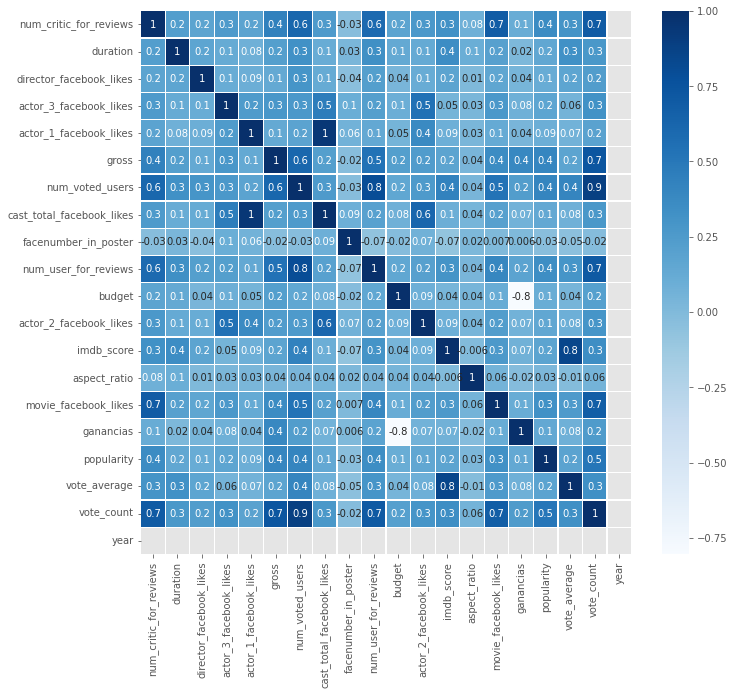

In [ ]:
fig, ax = plt.subplots(figsize=(11,10))
sns.heatmap(movies1.corr(),fmt='.1g', cmap='Blues', annot=True, linewidths = 0.2);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



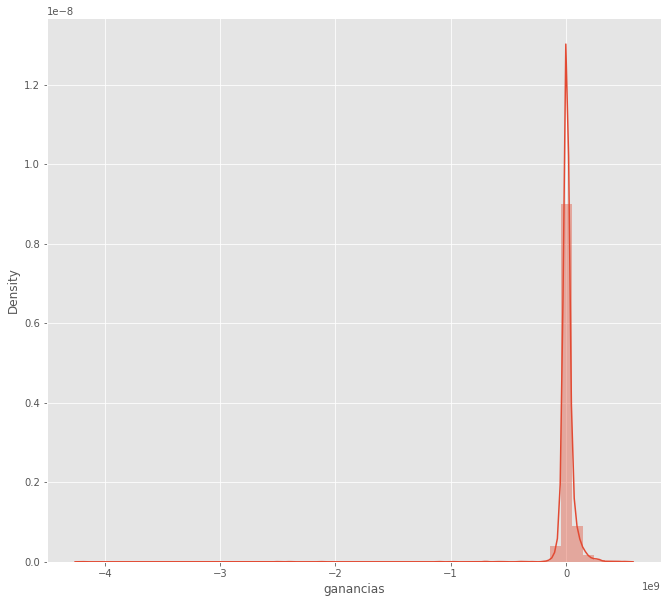

In [ ]:
fig, ax = plt.subplots(figsize=(11,10))
sns.distplot(movies1.ganancias);

Podemos ver que estos datos no están muy sesgados, sin embargo , es difícil sacar conclusiones de este gráfico. Sabemos que debemos normalizar estos datos.

La transformación(log) logarítmica, un método ampliamente utilizado para tratar los datos sesgados, es una de las transformaciones más populares utilizadas en la investigación. Por lo tanto, utilizaremos la transformación logarítmica en los ingresos.

In [ ]:
# creando la transformación log para las ganancias
movies1['log_revenue'] = np.log1p(movies1['ganancias']) #No estamos usando log0 para evita & y los valores nulos como deben haber

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

invalid value encountered in log1p



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribución de las ganancias(log transformation)')

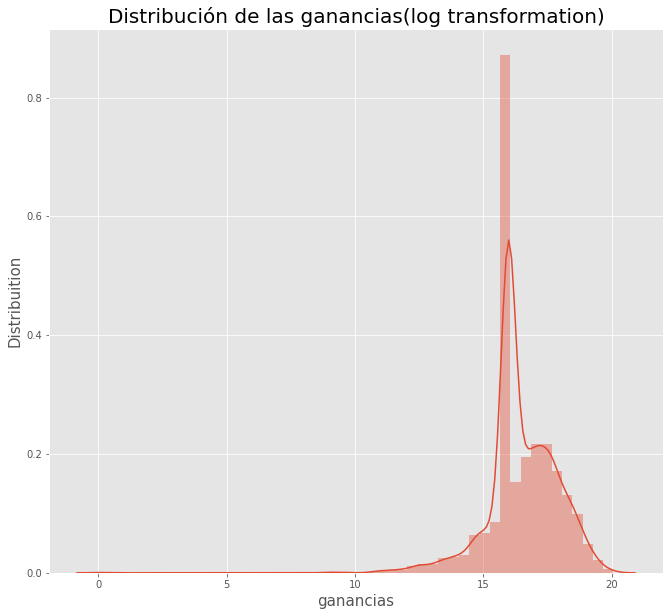

In [ ]:
plt.figure(figsize=(11,10))

# Subplot nos permite graficar más de uno 
# en este caso, se creará una cuadrícula de subtrama de 2 x 1

# establecer la distribución de nuestros datos y normalizar usando np.log en valores superiores a 0 y + 
# también estableceremos el número de bins y si queremos o no kde en nuestro
ax = sns.distplot(movies1['log_revenue'])
ax.set_xlabel('ganancias', fontsize=15) #configuración de la etiqueta x y el tamaño de la fuente
ax.set_ylabel('Distribuition', fontsize=15) #configuración de la etiqueta Y y el tamaño de la fuente
ax.set_title("Distribución de las ganancias(log transformation)", fontsize=20) #seting the title and size of font

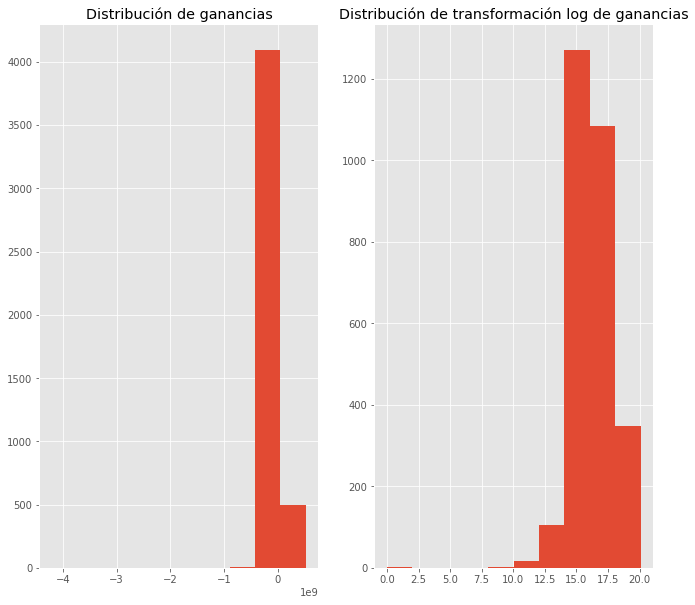

In [ ]:
#comparando la distribución de ganancias y registro de ganancias o log_revenue lado a lado con histograma
fig, ax = plt.subplots(figsize = (11, 10))
plt.subplot(1, 2, 1) #1 significa 1 gráfico, 2 significa columna y 1 significa 1 subgráfico
plt.hist(movies1['ganancias']);
plt.title('Distribución de ganancias');
plt.subplot(1, 2, 2)#1 significa 1 gráfico, 2 significa columna y 2 significa segundo subgráfico
plt.hist(movies1['log_revenue']);
plt.title('Distribución de transformación log de ganancias');

Podemos ver que la distribución original i.s (una sin registro) está sesgada. Utilizamos el método de transformación de registros e hicimos una distribución normal de los datos que tiene menos asimetría y curtosis.

## Relación entre ganancias cinematográficos y presupuesto

Encontremos la correlación entre los ingresos y el presupuesto. Busquemos también el grado de correlación.

In [ ]:

#transformación log de budget
movies1['log_budget'] = np.log1p(movies1['budget'])

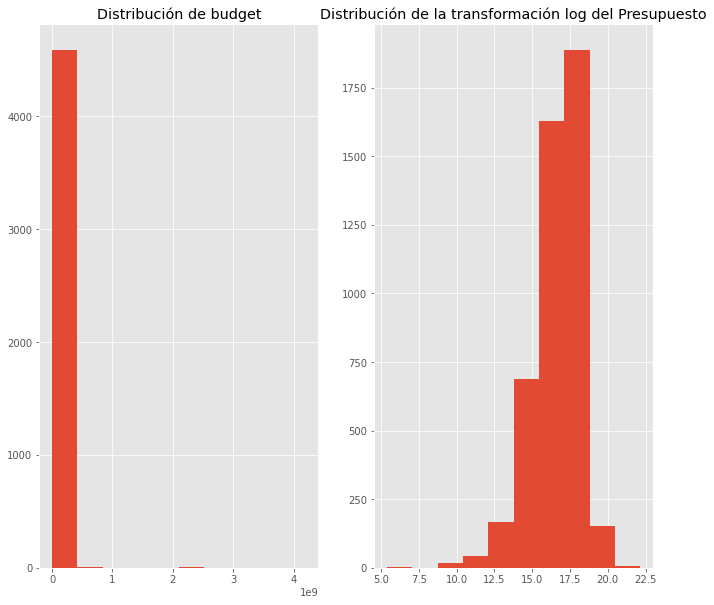

In [ ]:
fig, ax = plt.subplots(figsize = (11, 10))
plt.subplot(1, 2, 1)
plt.hist(movies1['budget']);
plt.title('Distribución de budget');
plt.subplot(1, 2, 2)
plt.hist(movies1['log_budget']);
plt.title('Distribución de la transformación log del Presupuesto');

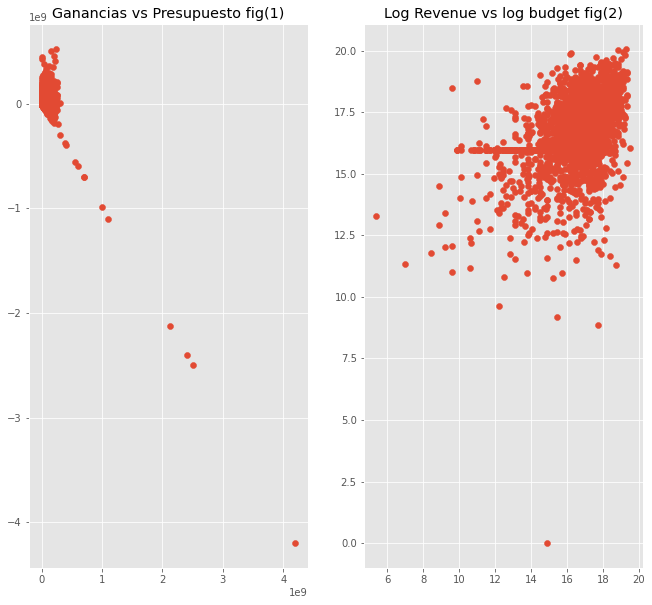

In [ ]:
#vamos a crear un diagrama de dispersión
plt.figure(figsize=(11, 10))
plt.subplot(1, 2, 1)
plt.scatter(movies1['budget'], movies1['ganancias'])
plt.title('Ganancias vs Presupuesto fig(1)');
plt.subplot(1, 2, 2)
plt.scatter(movies1['log_budget'], movies1['log_revenue'])
plt.title('Log Revenue vs log budget fig(2)');

Fig (1): podemos ver que hay alguna correlación entre el presupuesto y los ingresos, pero no estamos claros. 

Sin embargo, la figura (2) indica que existe una correlación entre ambas variables, que es la transformación logarítmica de los ingresos y la transformación logarítmica del presupuesto. 

También podemos ver muchas películas con un presupuesto cero, ya que identificamos que había 815 películas con un presupuesto cero que aclararemos más adelante.

¿Hay alguna relación con Homepage y Revenue?

Averigüemos la correlación entre dos variables. Estamos más interesados en responder si tener una página de inicio oficial para la película afecta a Reveune o no.

Todos sabemos que la página de inicio será única para cada película. Significa que la película diferente tiene una página de inicio diferente, excepto la película que tiene una secuela/precuela.

In [ ]:
#Veamos si el sitio web de películas cuenta menos de 1 (significa único) o más de 1 (significa repetitivo) o no.
movies1['homepage'].value_counts().head(10)

http://www.imdb.com/title/tt0157472/?ref_=fn_tt_tt_1    2
http://www.imdb.com/title/tt0235679/?ref_=fn_tt_tt_1    2
http://www.imdb.com/title/tt0270288/?ref_=fn_tt_tt_1    2
http://www.imdb.com/title/tt0022879/?ref_=fn_tt_tt_1    2
http://www.imdb.com/title/tt1791682/?ref_=fn_tt_tt_1    1
http://www.imdb.com/title/tt0432637/?ref_=fn_tt_tt_1    1
http://www.imdb.com/title/tt1491044/?ref_=fn_tt_tt_1    1
http://www.imdb.com/title/tt0309912/?ref_=fn_tt_tt_1    1
http://www.imdb.com/title/tt0171356/?ref_=fn_tt_tt_1    1
http://www.imdb.com/title/tt0278731/?ref_=fn_tt_tt_1    1
Name: homepage, dtype: int64

Podemos ver que la página web de películas de clockstoppers aparece 2 veces, lo cual es obvio porque todos sabemos que esta película tiene una secuencia. Lo mismo ocurre con el señor de los anillos y los hobits.

Averigüemos si tener una página de inicio afecta o no los ingresos. Y para eso, primero descubramos que las películas tienen página de inicio o no.

In [ ]:
#vamos a crear una columna llamada has_homepage y pase dos valores 1,0 (1, indica que tiene página de inicio, 0 indica que no tiene página)
movies1['has_homepage'] = 0
movies1.loc[movies1['homepage'].isnull() == False, 'has_homepage'] = 1 #1 here means it has home page

<Figure size 792x720 with 0 Axes>

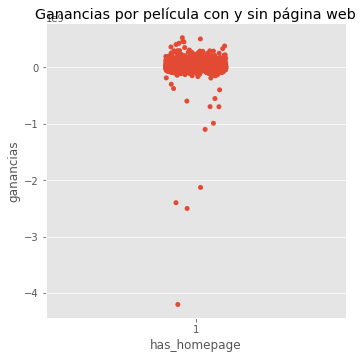

In [ ]:
#dado que has_homepage es un valor categórico, usaremos catplot seaborn.
plt.figure(figsize=(11, 10))
sns.catplot(x='has_homepage', y='ganancias', data=movies1);
plt.title('Ganancias por película con y sin página web');

En la figura anterior podemos ver que no hay  película que tiene página de inicio (indicada en azul) por lo tanto para esta información no tenemos punto de comparación para saber si tiene más ingresos las películas con homepage. A partir de este diagrama de dispersión podemos decir que no pueden estar correlacionados.

##Distribución de idiomas frente a ingresos medios

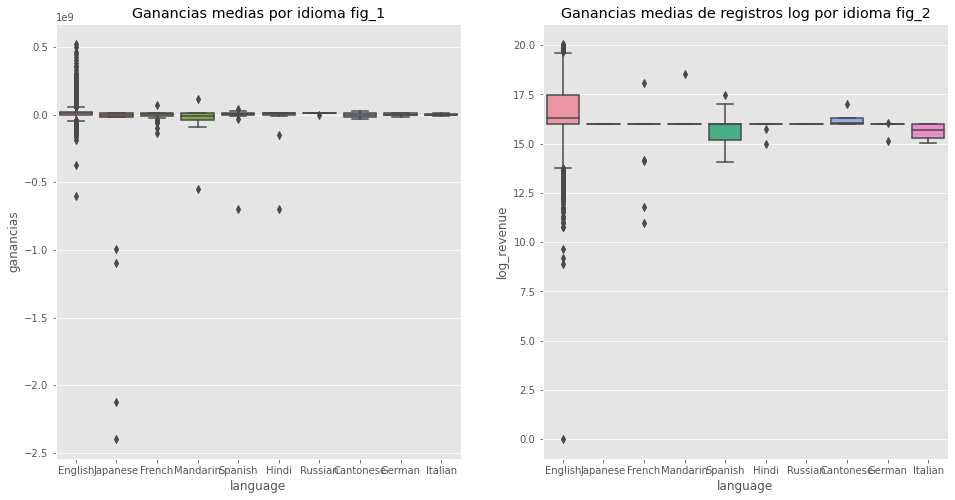

In [ ]:
#estaremos usando blox pot
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='language', y='ganancias', data=movies1.loc[movies1['language'].isin(movies1['language'].value_counts().head(10).index)]);
plt.title('Ganancias medias por idioma fig_1');
plt.subplot(1, 2, 2)
sns.boxplot(x='language', y='log_revenue', data=movies1.loc[movies1['language'].isin(movies1['language'].value_counts().head(10).index)]);
plt.title('Ganancias medias de registros log por idioma fig_2');


En la fig_1 podemos ver que el eje x indica el idioma trazado. Podemos ver que el idioma inglés tiene mayores ingresos por un amplio margen en comparación con su idioma. Este gráfico también nos dice que el idioma inglés superó a todos los demás idiomas en términos de ingresos. Esta información puede ser bastante incorrecta y engañosa. Veamos fig_2 para más detalles.

De la fig_2: podemos ver que el idioma original vs la transformación logarítmica de los ingresos y podemos ver que otros idiomas también están generando ingresos cerca del idioma inglés. Sin embargo, es la película en inglés la que lidera.

# Data Wranling(Limpieza de datos nulos)

In [ ]:
!pip install mlxtend -q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


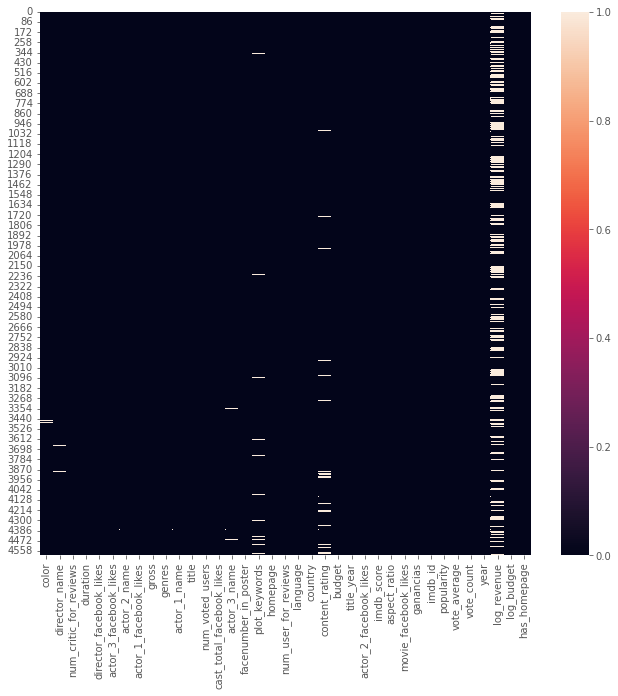

In [ ]:
# VERIFICO QUE LOS DATOS NULOS SE MUESTRAN EN DISTINTAS COLUMNAS, PARA VER SI CONVIENE ELIMINAR FILAS.
fig, ax = plt.subplots(figsize=(11, 10))
sns.heatmap(movies1.isnull())

Revisamos las variables con mayor cantidad de nulos y que además son de importancia para nuestro análisis y modelo de predicción. En este caso centraremos atención log_revenue que es el que tengo con datos nulos.

log_revenue tiene muchos datos nulos así que como son valores que requerimos para realizar el modelo, los reemplazaremos por la mediana.

In [ ]:
movies1.log_revenue.value_counts() # Decision: reemplazar por la media

15.978053    854
17.010094      2
17.330037      2
18.033547      2
17.672021      2
            ... 
19.305742      1
14.766484      1
15.610512      1
16.469711      1
11.340035      1
Name: log_revenue, Length: 1966, dtype: int64

In [ ]:
# REEMPLEZAR LOS NULOS CON DATOS FLOAT O INT POR LA MEDIA
movies1.fillna(movies1.mean(), inplace=True)
print(movies1.shape)
print(movies1.head().round(2)) # redondeo con una cifra decimales

(4596, 37)
   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4  Color     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1              

<ipython-input-42-86df8817a443>:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
#Rectificamos de nuevo 
movies1.log_revenue.value_counts() 

16.488164    1767
15.978053     854
17.330037       2
16.785925       2
16.845644       2
             ... 
19.305742       1
14.766484       1
15.610512       1
16.469711       1
11.340035       1
Name: log_revenue, Length: 1967, dtype: int64

##¿Cuáles son las palabras frecuentes en los títulos y descripciones de las películas?

 En este análisis solucionaremos la curiosidad por conocer los títulos de películas populares y también saber si la descripción/sinopsis afecta los ingresos o no.

Usaremos la biblioteca wordcount. La nube de palabras es una técnica de visualización de datos utilizada para la representación de datos de texto en el que el tamaño de cada palabra indica su frecuencia o importancia.

In [ ]:
movies1.columns


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'title',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'homepage',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'ganancias', 'imdb_id',
       'popularity', 'vote_average', 'vote_count', 'year', 'log_revenue',
       'log_budget', 'has_homepage'],
      dtype='object')

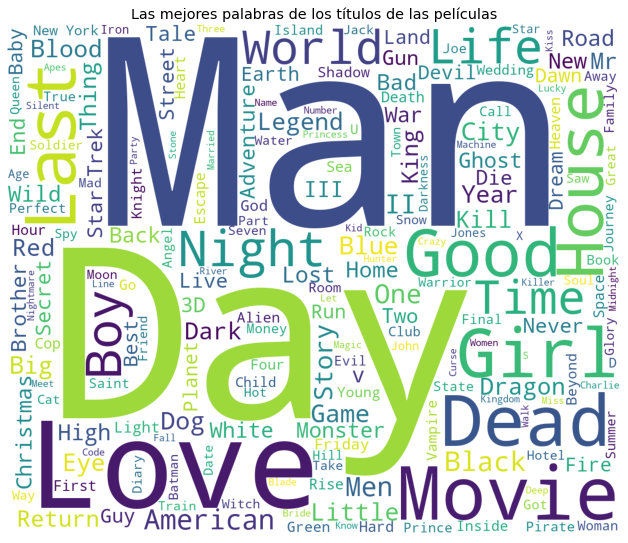

El tiempo necesario para completar esta  5.828540325164795 segundos


In [ ]:
#vamos a encontrar las mejores palabras de los títulos de películas
start = time.time()
plt.figure(figsize = (11, 10))
token_title = ' '.join(movies1['title'].values) #crear división al título por espacio para extraer el texto..
#bg color configurado en blanco para un buen contraste, por defecto el color bg es más oscuro
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(token_title)
plt.imshow(wordcloud)
plt.title('Las mejores palabras de los títulos de las películas')
plt.axis("off") # no necesitamos axes para esto
plt.show()
print("El tiempo necesario para completar esta ", time.time() - start, 'segundos')


Podemos ver que las palabras más populares son Man, Love, Day y así sucesivamente. Las palabras más populares o frecuentes están en tamaño más grande.

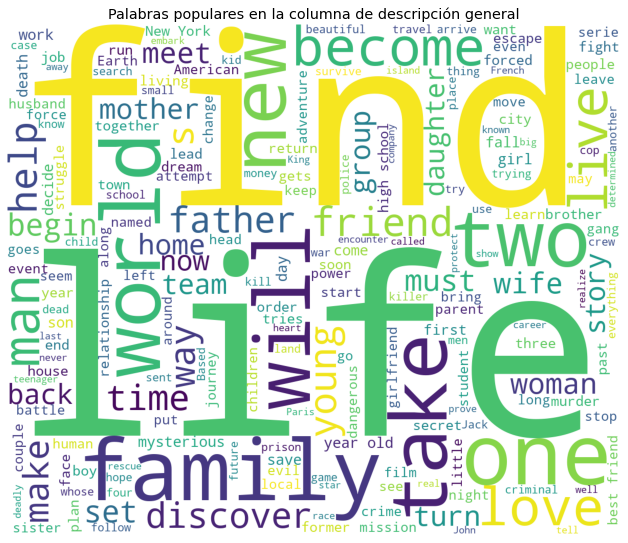

El tiempo necesario para completar esta  9.8525972366333 segundos


In [ ]:
#vamos a encontrar las palabras populares de la columna de descripción general en el segundo dataset
start = time.time()
plt.figure(figsize = (11, 10))
text = ' '.join(movies2['overview'].fillna('').values)#llene los valores con una cadena vacía si no hay ningún valor en ella.
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Palabras populares en la columna de descripción general')
plt.axis("off")
plt.show()
print("El tiempo necesario para completar esta ", time.time() - start, 'segundos')
     

Las palabras más grandes significan palabras que ocurren con frecuencia. Podemos ver que vida(life), encontrar(find), familia(family), etc., son las palabras más populares en la descripción de películas.

# ¿La descripción de la película afecta los ingresos?

Averigüemos si existe algún vínculo entre las palabras y los ingresos. ¿La palabra en la descripción afecta los ingresos?

Para este enfoque, utilizaremos el método de regresión lineal. Sí, regresión lineal para datos de cadena y podemos lograr esto usando el vector TFID.

TFID ayuda a tp a transformar el texto en vectores de características que se pueden usar como entrada para el estimador.
TFID es la representación numérica de la frecuencia de las palabras en torno a la descripción de los datos.

Ajustaremos un modelo de regresión lineal a estos datos para predecir la generación de ganancias. Para esto, usaremos el paquete eli5 que ayuda a depurar el clasificador de aprendizaje automático y también nos ayuda a explicar la predicción. Para que sea más fácil encontrar qué palabras afectan los ingresos.



In [ ]:
vectorizer = TfidfVectorizer(
            sublinear_tf=True,
            analyzer='word',
            token_pattern=r'\w{1,}',
            ngram_range=(1, 2),
            min_df=5)

overview_text = vectorizer.fit_transform(movies1['genres'].fillna(''))
linreg = LinearRegression()
linreg.fit(overview_text, movies1['log_revenue'])
eli5.show_weights(linreg, vec=vectorizer, top=20, feature_filter=lambda x: x != '')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Weight?,Feature
+16.110,<BIAS>
+3.314,drama romance
+2.856,comedy romance
+2.649,fantasy romance
+2.373,music romance
+2.170,musical romance
+2.117,family romance
+2.095,animation comedy
+1.745,mystery romance
+1.685,crime


Podemos ver que los generos que pueden tener impactos tanto positivos como negativos en los ingresos. Generos como drama y romance, comedia y romance,tienen un impacto positivo y géneros como  como crimen/horror,animación,historia y documental tiene un impacto negativo en las ganancias. Entonces las ganancias de una película no van a tener un impacto significativo en las ganancias pero es válido tener en cuenta los géneros que tienen impacto positivo en las ganancias. 

In [ ]:
print('Target value:', movies1['log_revenue'][1000])
eli5.show_prediction(linreg, doc=movies1['genres'].values[1000], vec=vectorizer)

Target value: 15.978052874877532


Podemos ver que los géneros pueden tener impactos tanto positivos como negativos en las ganancias. Solo los géneros como comedy y music, y demás tienen un impacto positivo y el genero como solo drama tienen un impacto negativo.

# Featured Engineering

El problema con release_date es que no está en el formato correcto, por lo que debemos estandarizar usando el formato de fecha y hora de pandas.

In [ ]:
movies2.loc[movies2['release_date'].isnull() == False, 'release_date'].head() #Para ver si la fecha de lanzamiento tiene valor nulo.

0    14-03-1972
1    23-09-1994
2    20-12-1974
3    19-10-1995
4    15-12-1993
Name: release_date, dtype: object

En este caso nuestros datos están correctos por ello dejamos abajo la función mencionada pero no la corremos. 

'''def fix_date(x):
    ##si el valor de la fecha aquí es menor que o igual a 19 
    #podemos anteponer 20 delante de este decir que la pelicula 
    #es de los 2000 de lo contrario, podemos anteponer 19 para decir
     #que la película es de 1900 '''
    '''year = x.split('-')[2]
    if int(year) <= 1979:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year'''

movies2['release_date'] = movies2['release_date'].apply(lambda x: fix_date(x)) #Aplicando función Lamda

In [ ]:
#vamos a crear una columna adicional como Año, mes, semana, trimestre
movies2['release_date'] = pd.to_datetime(movies2['release_date']) #convirtiendo en panda date time
movies2['release_date'].head()

0   1972-03-14
1   1994-09-23
2   1974-12-20
3   1995-10-19
4   1993-12-15
Name: release_date, dtype: datetime64[ns]

In [ ]:
'''esta función agrega columna como columna de año,
 día de la semana, mes, etc. y agregue el prefijo de 
 release_date antes toda la columna anterior, por ejemplo, 
 realease_date_year'''

def process_date(df_date):
    '''this function add column like 
     year, weeekday, month and so on column
    and add prefix of release_date before 
    all the above column eg realease_date_year'''
    date_parts = ["year", "weekday", "month", 'weekofyear', 'day', 'quarter']
    for part in date_parts:
        part_col = 'release_date' + "_" + part #add prefix as  "release_date" before the columne
        movies2[part_col] = getattr(movies2['release_date'].dt, part).astype(int)
    
    return df_date

In [ ]:
movies2 = process_date(movies2)

<ipython-input-51-7d57c37a1755>:14: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [ ]:
# Cuente el número de películas estrenadas por año y ordene los años en orden ascendente 
# Haga esto tanto para los conjuntos de entrenamiento como para los de prueba
moviesf = movies2['release_date_year'].value_counts().sort_index()
# los valores x son años y los valores y son recuentos de películas, nombre=leyenda
data = go.Scatter(x=moviesF.index, y=moviesF.values, name='movies data')


layout = go.Layout(title = "Número de películas por año", xaxis_title ='Fecha de lanzamiento en el año',yaxis_title ='Recuento de películas')
py.iplot(dict(data=data, layout=layout))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



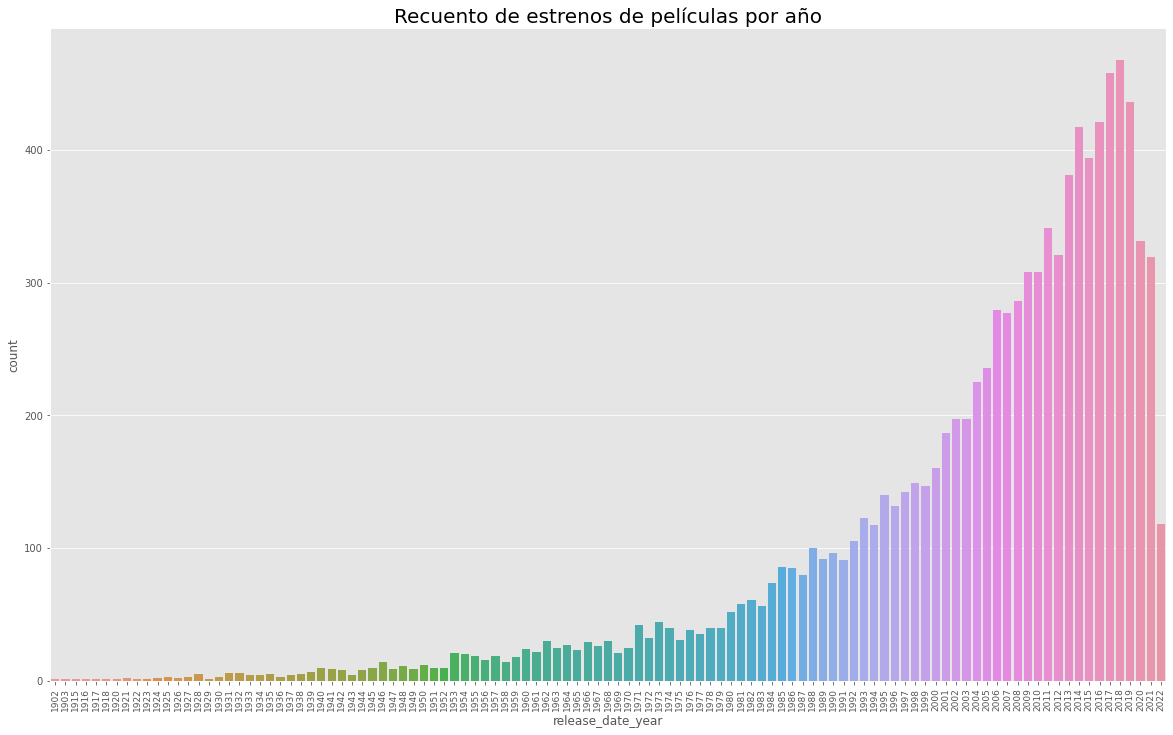

In [ ]:
 #Gráfico countplot para el año de lanzamiento de películas
plt.figure(figsize=(20,12))
sns.countplot(movies2['release_date_year'].sort_values())
plt.title("Recuento de estrenos de películas por año",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=9,rotation=90)
plt.show()

Podemos ver que desde la década de 2000 se han lanzado más películas. Podemos ver que el año 2018 tiene la mayor cantidad de películas lanzadas, es decir, más de 140 películas en un año.

In [ ]:
movies2.columns

Index(['Unnamed: 0', 'title', 'overview', 'language', 'popularity',
       'vote_average', 'vote_count', 'release_date', 'release_date_year',
       'release_date_weekday', 'release_date_month', 'release_date_weekofyear',
       'release_date_day', 'release_date_quarter'],
      dtype='object')

In [ ]:
#gráfico de la fecha de lanzamiento frente a los ingresos
from plotly.offline import iplot
d1 = movies1['year'].value_counts().sort_index()
d2 = movies1.groupby(['year'])['ganancias'].mean()

data = [go.Scatter(x=d1.index, y=d1.values, name='film count'),
        go.Scatter(x=d2.index, y=d2.values, name='mean revenue', yaxis='y2')]

layout = go.Layout(dict(title = "Número de películas e ingresos medios por año",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  yaxis2=dict(title='Average revenue', overlaying='y', side='right')
                  ),legend=dict(
                orientation="v"))
iplot(dict(data=data, layout=layout))


En este gráfico, podemos ver el gráfico de ingresos totales frente al recuento de lanzamientos de películas desde el año 1916 hasta 2016.

#20 mejores películas por ingresos

In [ ]:
# Debido a que están las fechas y años con más digitos de los esperados 
#extraigo los últimos 4 digitos
movies1["title_year"] = movies1["title_year"].astype(str)

def extract_last_4_digits(value):
    return int(value[-4:])

movies1["title_year"] = movies1["title_year"].apply(extract_last_4_digits)

In [ ]:
movies1.sort_values(by='ganancias', ascending=False).head(20)[['title','ganancias','title_year']]

,title,ganancias,title_year
0,Avatar,523505847.0,2009
28,Jurassic World,502177271.0,2015
25,Titanic,458672302.0,1997
2890,Star Wars: Episode IV - A New Hope,449935665.0,1977
2945,E.T. the Extra-Terrestrial,424449459.0,1982
16,The Avengers,403279547.0,2012
492,The Lion King,377783777.0,1994
232,Star Wars: Episode I - The Phantom Menace,359544677.0,1999
65,The Dark Knight,348316061.0,2008
425,The Hunger Games,329999255.0,2012


# ¿Relación entre la duración y las ganancias?

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



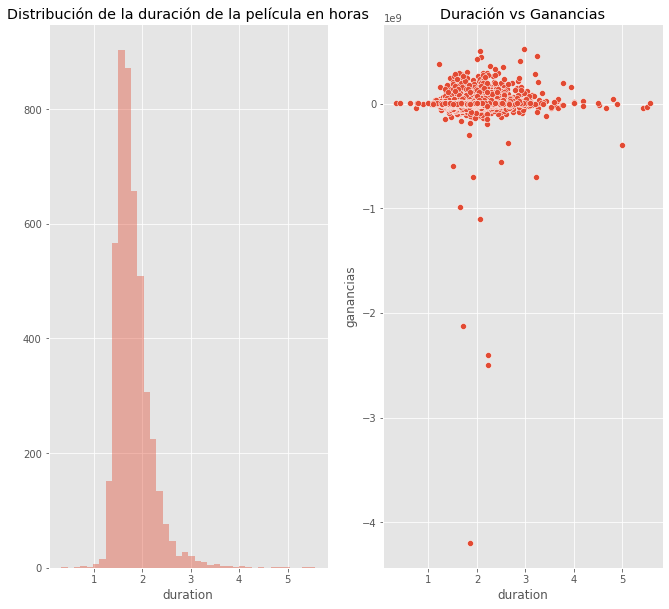

In [ ]:
plt.figure(figsize=(11, 10))
plt.subplot(1, 2, 1)
sns.distplot(movies1['duration'].fillna(0) / 60, bins=40, kde=False);#rellenar el tiempo de ejecución con 0 si faltan valores 
plt.title('Distribución de la duración de la película en horas');
plt.subplot(1, 2, 2)
sns.scatterplot(movies1['duration'].fillna(0)/60, movies1['ganancias'])
plt.title('Duración vs Ganancias');


Aquí tenemos el tiempo de ejecución en horas en el eje x y la frecuencia de la película en el eje y y luego vemos que la mayoría de las películas duran entre 1 y 3 horas. Y la película que cae en esta duración tiene las ganancias más altos.

# Encuentra los mejores géneros de la lista de películas

In [ ]:
# Vamos a separar los generos 
movies1["genres"] = movies1["genres"].str.split("|").str.get(0)

In [ ]:
unique_genres = movies1["genres"].apply(pd.Series).stack().unique()
print("Number of genres: {}".format(len(unique_genres)))
print("Genres: {}".format(unique_genres))

Number of genres: 19
Genres: ['Action' 'Adventure' 'Drama' 'Animation' 'Comedy' 'Mystery' 'Crime'
 'Biography' 'Fantasy' 'Documentary' 'Sci-Fi' 'Horror' 'Romance'
 'Thriller' 'Family' 'Music' 'Western' 'Musical' 'Film-Noir']


In [ ]:
genres_dummies = pd.get_dummies(movies1["genres"].apply(pd.Series).stack()).sum(level=0) #one hot encoding
genres_dummies.head()

<ipython-input-89-d0a53e553730>:1: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().



,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller,Western
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_genres = pd.concat([movies1, genres_dummies],axis=1, sort=False) #merging two data frame
train_genres.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,homepage,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,ganancias,imdb_id,popularity,vote_average,vote_count,year,log_revenue,log_budget,has_homepage,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller,Western
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009,936.0,7.9,1.78,33000,523505847.0,tt0499549,185.070892,7.2,12114.0,1970,20.076059,19.283571,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007,5000.0,7.1,2.35,0,9404152.0,tt0449088,31.363664,6.9,4627.0,1970,16.056662,19.519293,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015,393.0,6.8,2.35,85000,-44925825.0,tt2379713,24.926577,6.3,4552.0,1970,16.488164,19.316769,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012,23000.0,8.5,2.35,164000,198130642.0,tt1345836,20.582580,7.6,9263.0,1970,19.104437,19.336971,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012,632.0,6.6,2.35,24000,-190641321.0,tt0401729,14.670353,6.1,2170.0,1970,16.488164,19.390323,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


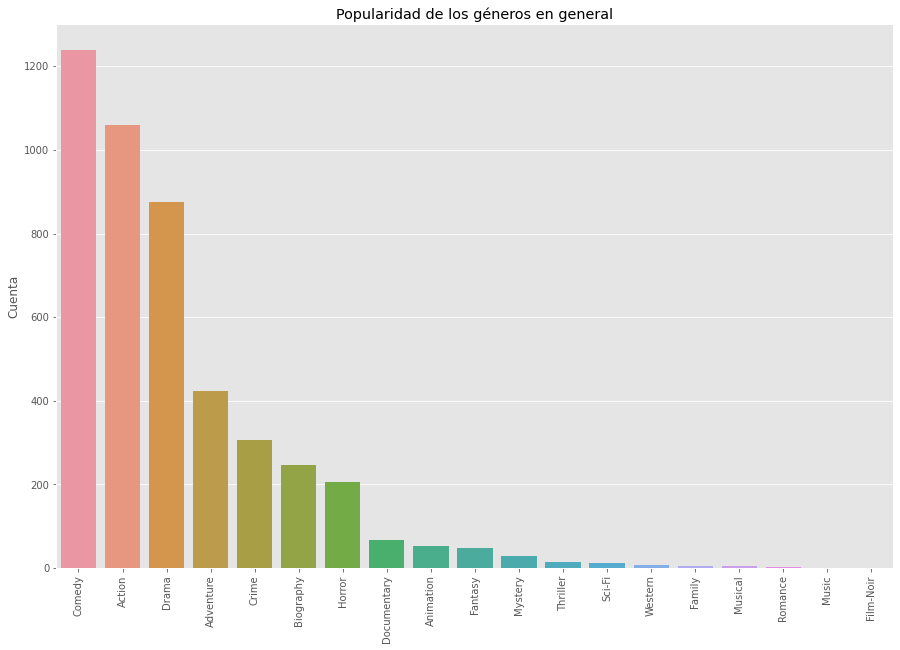

In [ ]:
genres_overall = train_genres[unique_genres].sum().sort_values(ascending=False)
plt.figure(figsize=(15,10))
ax = sns.barplot(x=genres_overall.index, y=genres_overall.values)
plt.xticks(rotation=90)
plt.title("Popularidad de los géneros en general")
plt.ylabel("Cuenta")
plt.show()

Verificando la gráfica anterior se evidencia

In [ ]:
#selección del marco de datos que es float,int
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] #así de fácil para nosotros realizar el entrenamiento y test
df_train=train_genres.select_dtypes(include=numerics)

In [ ]:
df_train.drop(columns=['imdb_score'],inplace=True) #we will be dropping ID
df_train=df_train.fillna(df_train.median()) #let's film the empty value with median of the data set


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_train.head(1)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,ganancias,popularity,vote_average,vote_count,year,log_revenue,log_budget,has_homepage
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009,936.0,1.78,33000,523505847.0,185.070892,7.2,12114.0,1970,20.076059,19.283571,1


In [ ]:
data = df_train.copy()

In [ ]:
data.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes',
       'ganancias', 'popularity', 'vote_average', 'vote_count', 'year',
       'log_revenue', 'log_budget', 'has_homepage'],
      dtype='object')

In [ ]:
train_genres.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'title',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'homepage',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'ganancias', 'imdb_id',
       'popularity', 'vote_average', 'vote_count', 'year', 'log_revenue',
       'log_budget', 'has_homepage', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'Western'],
      dtype='object')

In [ ]:
zero_budget = train_genres[train_genres["budget"]>=100000000]
print(len(zero_budget))
zero_budget[["title","title_year","budget"]].head(10)

340


,title,title_year,budget
0,Avatar,2009,237000000.0
1,Pirates of the Caribbean: At World's End,2007,300000000.0
2,Spectre,2015,245000000.0
3,The Dark Knight Rises,2012,250000000.0
4,John Carter,2012,263700000.0
5,Spider-Man 3,2007,258000000.0
6,Tangled,2010,260000000.0
7,Avengers: Age of Ultron,2015,250000000.0
8,Harry Potter and the Half-Blood Prince,2009,250000000.0
9,Batman v Superman: Dawn of Justice,2016,250000000.0


#Regresión Lineal 

In [ ]:
x = df_train[['popularity', 'duration', 'budget']]
y = df_train['ganancias']

In [ ]:
X = data.drop(['ganancias','log_revenue', 'budget'],axis=1)
y = data['log_revenue']

sub_X = data.drop(['ganancias','log_revenue','budget'], axis=1)


In [ ]:
def rmse_score(y1, y2):
    return np.sqrt(np.power(y1-y2,2).mean())

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
     

In [ ]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train,y_train)
y_hat = LR_model.predict(X_test)

print(rmse_score(y_hat, y_test))
sub_y = LR_model.predict(sub_X)

0.8008382859383388


# Regresión Mulineal 

In [ ]:
df_train=train_genres.select_dtypes(include=numerics)


In [ ]:
moviesf = moviesf.reset_index()
print(moviesf)


     level_0  index  release_date_year
0          0   1902                  1
1          1   1903                  1
2          2   1915                  1
3          3   1916                  1
4          4   1917                  1
..       ...    ...                ...
104      104   2018                468
105      105   2019                436
106      106   2020                331
107      107   2021                319
108      108   2022                118

[109 rows x 3 columns]


In [ ]:
data.shape

(4596, 23)

In [ ]:
X = data[['popularity', 'duration', 'budget']]
y = data['ganancias']

In [ ]:
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm5 = LinearRegression() #lm5 fifth model without newspaper
lm5.fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm5_preds)))
print("R^2: ", r2_score(y_test, lm5_preds))

RMSE : 66314904.23960234
R^2:  0.7740006534376851


# SVR

In [ ]:
#SVR
from sklearn.svm import SVR

SVR_model = SVR(C = 5)
SVR_model.fit(X_train, y_train)

y_hat = SVR_model.predict(X_test)

print(rmse_score(y_hat, y_test))
sub_y = SVR_model.predict(sub_X)

0.8199469439749945


# Ramdon Forest

In [ ]:
#random forrest
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(random_state =0, n_estimators=500, max_depth=10)
RF_model.fit(X_train, y_train)

y_hat = RF_model.predict(X_test)
print ("R-Squared is:", metrics.r2_score(y_hat, y_test))
print(rmse_score(y_hat, y_test))
sub_y = RF_model.predict(sub_X)

R-Squared is: 0.6232208438753106
0.535888245275225


In [ ]:
from sklearn.neural_network import MLPRegressor
MLP_model = MLPRegressor(random_state = 0, hidden_layer_sizes=(50,50))
MLP_model.fit(X_train, y_train)

y_hat = MLP_model.predict(X_test)
print(rmse_score(y_hat, y_test))
sub_y = MLP_model.predict(sub_X)

10569.97903267629


#Creación de variables sintéticas

##a.Clase de Película según su duración

**Las películas se dividen normalmente en tres tipos en base a su duración:**

Cortometraje, hasta 30  minutos.

Mediometraje, de 30 a 60 minutos.

Largometraje, a partir de 60 minutos.

In [ ]:
# Agregamos la variable Clase de película por duración 1:Largometraje, 2:Mediometraje, 3:Cortometraje
#Cortometraje, hasta 30 minutos. Mediometraje, de 30 a 60 minutos. Largometraje, a partir de 60 minutos
movies1['Clase_duracion']=np.where(movies1.duration >=60, 1,
         np.where(((movies1.duration <60) & (movies1.duration >30)),2,3))


##b. Clase de película según el público

**Las películas se clasifican en función de la edad mínima del público objetivo, el código está normalizado por país y en EEUU se utiliza el siguinte, crearemos una nueva variable que se adecúe a este formato:**

G: todas las edades	Todos los públicos.	

PG:	En compañía

PG-13:	En compañía nocturna, muchos mayores de 13 años lo están	Guía paternal estricta.

R:	En compañía estricta, muchos mayores de 17 años lo están viendo (no se admiten niños y menores de 17/18 años)	Restringido.	

NC-17:	Solo mayores de 18 años	Prohibido para audiencia de 17 años y menos.	

NR:	Desconocido (no está clasificado aún)	Sin clasificar.	

La Clsificación según el público está en la variable: content_rating, de esta vamos a extraer las primeras 6 letras que representan la calificación de contenidos.

In [ ]:
movies1['Clasificacion']=movies1['content_rating'].astype(str).str[0:6]
movies1['Clasificacion']=movies1.Clasificacion.str.upper()

Crearemos una Nueva Variable estandarizada, según la normativa de EEUU

In [ ]:
movies1['clasificacion_publico']=np.where(movies1.Clasificacion =='R', 'R',
                              np.where(movies1.Clasificacion =='NOT RA', 'NR',
                              np.where(movies1.Clasificacion =='UNRATE', 'NR',
                              np.where(movies1.Clasificacion =='APPROV', 'NR',
                              np.where(movies1.Clasificacion =='X', 'NR',                                       
                              np.where(movies1.Clasificacion =='PASSED', 'NR',
                              np.where(movies1.Clasificacion =='GP', 'PG',
                              np.where(movies1.Clasificacion =='M', 'NR',
                              np.where(movies1.Clasificacion =='TV-G', 'G',
                              np.where(movies1.Clasificacion =='TV-14', 'PG-13',
                              np.where(movies1.Clasificacion =='TV-PG', 'PG',movies1.Clasificacion)))))))))))

Ahora la transformaremos en numérica

In [ ]:
#Ordenamos la clase de Público y la transformamos en numérica
movies1['clasificacion_publico']=np.where(movies1.Clasificacion =='G', 1,
                              np.where(movies1.Clasificacion =='PG', 2,
                              np.where(movies1.Clasificacion =='PG-13', 3,
                              np.where(movies1.Clasificacion =='NR',4,
                              np.where(movies1.Clasificacion =='R', 5,                                       
                              np.where(movies1.Clasificacion =='NC-17', 6,
                              np.where(movies1.Clasificacion =='NAN', 7,4)))))))

##c. Crearemos 3 variables más, que nos indican si la película está por arriba o por debajo de la media en relación a: Likes en facebook, popularidad y ganancias

In [ ]:
#Primero calculamos las medias de cada variable
mean_facebook = movies1['movie_facebook_likes'].mean()
mean_popularity = movies1['popularity'].mean()
mean_ganancias = movies1['ganancias'].mean()
print(mean_facebook)
print(mean_ganancias)
print(mean_popularity)

7747.065274151436
8830215.014102422
9.24485700826806


In [ ]:
#Segundo creamos las variables sintéticas  de Popularidad, ganancias y Presencia en Facebook 1=Alta 0=baja, si están por encima de la media calculada anteriormente será alta, sino baja.
movies1['Popularidad']=np.where(movies1.popularity >= 9,1, 0)
movies1['Facebook']=np.where(movies1.movie_facebook_likes >= 7747,1, 0)
movies1['ganancias_nivel']=np.where(movies1.ganancias >= 8830215,1, 0)

In [ ]:
#transformamos los valores de Gross, Budget, ganancias y duration en integer
movies1['gross']=movies1['gross'].astype('int')
movies1['budget']=movies1['budget'].astype('int')
movies1['ganancias']=movies1['ganancias'].astype('int')
movies1['duration']=movies1['duration'].astype('int')

##d. Creamos una última variable que indica si el género está incluido dentro de las películas que registraron mayor ganancia.

Recordemos cuales son los Géneros que registran mayor ganancia:

In [ ]:
#Adecuamos la variable "genres"
movies1["genres"] = movies1["genres"].str.split("|").str.get(0)

In [ ]:
train_genres1 = pd.concat([movies1, genres_dummies],axis=1, sort=False) 

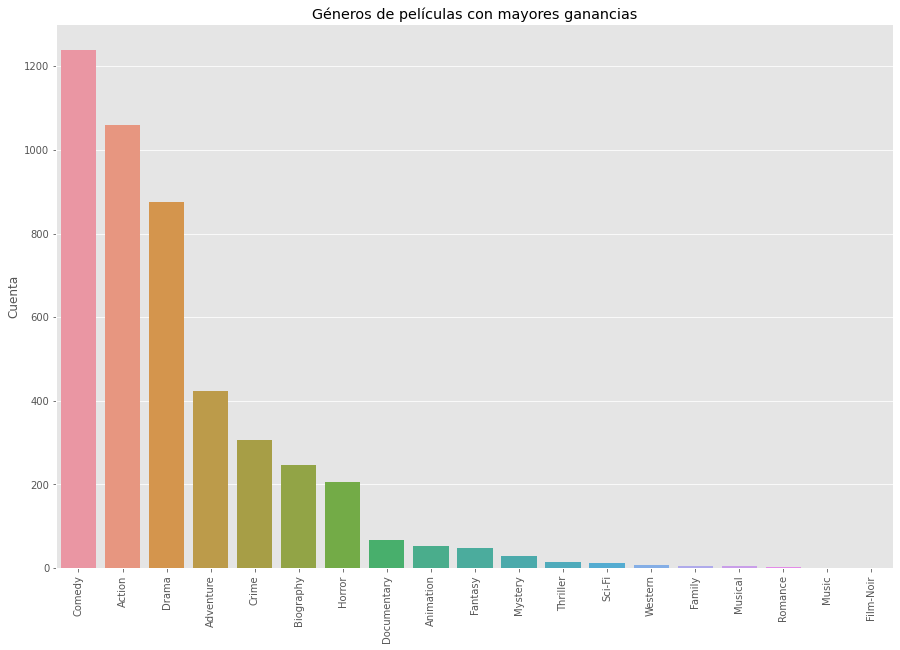

In [ ]:
#Visualizamos las películas con las mayores ganancias
genres_overall = train_genres1[unique_genres].sum().sort_values(ascending=False)
plt.figure(figsize=(15,10))
ax = sns.barplot(x=genres_overall.index, y=genres_overall.values)
plt.xticks(rotation=90)
plt.title("Géneros de películas con mayores ganancias")
plt.ylabel("Cuenta")
plt.show()

In [ ]:
#Creamos una variable género que me dice si el género está dentro de los que se registran en las 5 películas con mayor ganancia será = True, si no Flase
movies1['Genero_ganancias']=movies1.genres.str.contains("Action" or "Drama"  or "Family" or "Adventure" or "Crime", case=False)

In [ ]:
#Paso esta variable a numérica
movies1['Genero_ganancias']=np.where(movies1.Genero_ganancias == True,'1','0')
movies1['Genero_ganancias']=movies1['Genero_ganancias'].astype('int')

In [ ]:
movies1['Genero_ganancias'].value_counts()

0    3537
1    1059
Name: Genero_ganancias, dtype: int64

Con respecto al conteo total de géneros que se encuentran en las 5 películas con mayor ganancias, obteniendo que 3537 películas no están dentro de estás películas y que 1059 películas tienen estos géneros. 

#PCA
A través de la aplicación del PCA (Principal Component Analysis), podremos elegir un menor número de predictores para pronosticar la variable objetivo.  Comprender mejor la distribución y la relación entre las variables, reducir la dimensionalidad de los datos, explicar la varianza y identificar outliers.

##PCA 1

In [ ]:
#Redefinimos el Dataframe
df_new=movies1[['popularity','Facebook','Popularidad','ganancias_nivel','Genero_ganancias','budget','ganancias']]

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        4596 non-null   float64
 1   Facebook          4596 non-null   int64  
 2   Popularidad       4596 non-null   int64  
 3   ganancias_nivel   4596 non-null   int64  
 4   Genero_ganancias  4596 non-null   int64  
 5   budget            4596 non-null   int64  
 6   ganancias         4596 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 251.5 KB


In [ ]:
#transformamos en Int, las siguientes variables float.
df_new['popularity']=df_new['popularity'].astype('int')
df_new['Facebook']=df_new['Facebook'].astype('int')
df_new['Popularidad']=df_new['Popularidad'].astype('int')
df_new['ganancias_nivel']=df_new['ganancias_nivel'].astype('int')
df_new['Genero_ganancias']=df_new['Genero_ganancias'].astype('int')
df_new['budget']=df_new['budget'].astype('int')
df_new['ganancias']=df_new['ganancias'].astype('int')

<ipython-input-161-066b008ad73a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-161-066b008ad73a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-161-066b008ad73a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-161-066

In [ ]:
df_new.shape

(4596, 7)

In [ ]:
#separamos las variables independientes en la matriz X y la variable dependiente en el vector y.
X = df_new.iloc[:, 0:6].values
y = df_new.iloc[:, 6].values

Al aplicar StandardScaler, cada característica de sus datos debe distribuirse normalmente de modo que escalará la distribución a una media de cero y una desviación estándar de uno.

In [ ]:
#Normalizo las features para poder trabajar
#from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # normalizing the features

Verifiquemos si los datos normalizados tienen una media de cero y una desviación estándar de uno.

In [ ]:
np.mean(X),np.std(X)

(4.53494058216484e-17, 1.0)

In [ ]:
X.shape

(4596, 6)

Convirtamos las características normalizadas en un formato tabular con la ayuda de DataFrame.

In [ ]:
columnas1 = ['caracteristicas'+str(i) for i in range(X.shape[1])]


In [ ]:
columnas1

['caracteristicas0',
 'caracteristicas1',
 'caracteristicas2',
 'caracteristicas3',
 'caracteristicas4',
 'caracteristicas5']

In [ ]:
normalised_movies = pd.DataFrame(X,columns=columnas1)

In [ ]:
normalised_movies.tail()

,caracteristicas0,caracteristicas1,caracteristicas2,caracteristicas3,caracteristicas4,caracteristicas5
4591,0.021002,-0.559592,1.146894,-0.681636,1.827551,-0.384625
4592,-0.647005,-0.559592,-0.871920,-0.681636,-0.547180,-0.384605
4593,-0.730506,-0.559592,-0.871920,-0.681636,-0.547180,-0.012405
4594,-0.730506,-0.559592,-0.871920,-0.681636,-0.547180,-0.012405
4595,-0.647005,-0.559592,-0.871920,-0.681636,-0.547180,-0.384685


In [ ]:
from sklearn.decomposition import PCA
pca_movies = PCA(n_components=2)
principalComponents_movies = pca_movies.fit_transform(x)


In [ ]:
principal_movies = pd.DataFrame(data = principalComponents_movies
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
print('Explicación de la variación para el componente principal: {}'.format(pca_movies.explained_variance_ratio_))


Explicación de la variación para el componente principal: [1.00000000e+00 5.34905424e-14]


Se puede observar que principal component 1contiene el 1 % de la información, mientras que principal component 2contiene solo el 5 % de la información.

In [ ]:
!pip install funpymodeling -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.5/215.5 KB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from pandas_profiling import ProfileReport
from funpymodeling.exploratory import cat_vars, num_vars

In [ ]:
#Preprocesamiento
X = df_new.drop('ganancias', 1)
y = df_new['ganancias']

<ipython-input-176-912a611a576c>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
#Separamos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Normalizamos los datos para que PCA funcione mejor!
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

El siguiente código implementa el análisis de componentes principales (PCA) utilizando la función PCA de scikit-learn. Se crea un objeto de PCA sin especificar el número de componentes principales a calcular y se ajusta a los datos de entrenamiento utilizando el método fit_transform. Luego, se transforman los datos de prueba utilizando el método transform.

In [ ]:
#Aplicacion de PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.35539271, 0.18063604, 0.14778989, 0.1292072 , 0.10876422,
       0.07820992])

**Conclusiones:**

Podemos decir que, sobre las 6 variables, el primer componente principal es responsable de la varianza del 35%. De manera similar, el segundo componente principal causa una variación del 18% en el conjunto de datos. En conjunto, podemos decir que (35 + 18) el 43% de la información de clasificación contenida en el conjunto de características es capturada por los dos primeros componentes principales. La elección para este análisis de mantener los componentes principales que explican una parte significativa de la varianza en los datos, pero no estariamos  incluyendo componentes que explican una cantidad mínima de varianza. Aun estamos realizando el análisis que vaya mejor con los objetivos de nuestro modelo. 



**Para finalizar, usemos una sola componente para entrenar un modelo de Random Forest y evaluar qué tan bien funciona!**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(X_train, y_train)

# Predicción
y_pred = model_rf.predict(X_test)

In [ ]:
#Evaluación básica del modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)

El accuracy del modelo es: 0.175


**Conclusiones:** 

En este caso, el accuracy es de 0.175, lo que significa que el modelo está predeciendo correctamente solo el 17.5% de las etiquetas. Esto puede indicar un modelo con un rendimiento bajo o datos con una distribución muy desequilibrada.

Únicamente utilizando una componente tenemos un accuracy de 0,17, lo que nos dice que el modelo no es muy bueno.

# Matriz de Confusión
Vamos a realizar una matriz de confusión para evaluar el rendimiento del modelo e identificar patrones en los errores de predicción.La función confusion_matrix crea una matriz de confusión que muestra cuántas etiquetas se han predecido correctamente y cuántas incorrectamente.

Donde y_test es la matriz con las etiquetas reales de los datos de prueba y y_pred es la matriz con las etiquetas predecidas por el modelo. 



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


##PCA 2

Usamos 3 dimensiones: ganancias + presupuesto + Genero_ganancias

In [ ]:
df_new2=movies1[['genres','Genero_ganancias','ganancias','budget']]

In [ ]:
df_new2.head()

,genres,Genero_ganancias,ganancias,budget
0,Action,1,523505847,237000000
1,Action,1,9404152,300000000
2,Action,1,-44925825,245000000
3,Action,1,198130642,250000000
4,Action,1,-190641321,263700000


In [ ]:
!pip install factor_analyzer -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 KB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.2/202.2 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 16.8 MB/s eta 0:00:00


### Creación del modelo de PCA

In [ ]:
#Importamos la libreria
from sklearn.decomposition import PCA

#Generamos el objeto
model_pca = PCA()

#Aplicamos pca
x_pca=model_pca.fit_transform(x_scaled)

NameError: ignored

Generamos el modelo y fiteamos:

In [ ]:
#Variaanza explicada de las componentes
var_explicada_pca = model_pca.explained_variance_ratio_
var_explicada_pca

**Interpretación**:

La primer componente aporta el 60 % de la varianza explicada, la segunda el 33% y así sucesivamente, en este caso por las especificaciones de este modelo el componente principal a seleccionar seria Genero_ ganancias.

#Probar distintos modelos y elegir el mejor teniendo en cuenta el Bias-Variance tradeoff

In [ ]:
# librerias
from numpy import mean
from numpy import std
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Preparamos los datos
df_new.head()

In [ ]:
df_new.shape

In [ ]:
df_new.isnull().sum()

In [ ]:
sum(df_new.isna().sum())
# no hay nulos

In [ ]:
data = df_new.values

##LooCV

LOOCV es una opción válida y útil en algunos casos, especialmente cuando el conjunto de datos es pequeño o cuando se requiere una precisión muy alta.A pesar de ser una técnica costosa en términos de tiempo y recursos, ya que requiere el entrenamiento de tantos modelos como elementos haya en el conjunto de datos. Sin embargo en este modelo la probamos debido a su rigurosidad ya que se utiliza el conjunto completo de datos para entrenar el modelo en cada iteración.

### LOOCV para regresion

In [ ]:
# separar en X y y
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

In [ ]:
# instanciamos el procediemiento LOOCV
cv = LeaveOneOut()

In [ ]:
# instanciamos el modelo
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42, n_estimators=10,max_depth=4)

In [ ]:
cross_val_score?

In [ ]:
# evaluar el modelo (criterio de comparacion MAE)
from sklearn.metrics import mean_squared_error,  make_scorer, mean_absolute_error

MAE = make_scorer(mean_absolute_error)

scores = cross_val_score(model, X, y, scoring=MAE, cv=cv, error_score='raise',verbose=1)
# convertir a postivos
scores = abs(scores)

# reportar el performance
print('MAE: %.3f std: (%.3f)' % (mean(scores), std(scores)))

**'Parallel(n_jobs=1)'** indica que se está utilizando un solo trabajo en paralelo para realizar la validación cruzada. El resultado muestra que el error medio absoluto (MAE) es de 20025466.579 y la desviación estándar es de 42687472.452. Esto significa que en promedio, el modelo está haciendo un error de 20025466.579 en sus predicciones y la dispersión de estos errores es de 42687472.452.

**Interpretación**
El modelo se evalúa usando LOOCV y el desempeño del modelo al hacer predicciones sobre nuevos datos tiene un MAE de  20025466.579, este resultado indica que el modelo tiene un desempeño moderado, pero la dispersión de los errores es alta (42687472.452), lo que significa que existe una gran variabilidad en los errores de predicción del modelo.  Por ello puede mejorarse el modelo de predicción.

### Validacion simple - Regresión

In [ ]:
# separar en X y y
X,y = data[:,:-1],data[:, -1]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, shuffle=True)
print(X_train.shape, X_test.shape)

In [ ]:
# Modelo
model =RandomForestRegressor(random_state=42, n_estimators=10,max_depth=4)
# Ajuste
model.fit(X_train,y_train)

In [ ]:
predicciones= model.predict(X_test)

In [ ]:
# Validacion simple
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('MSE: ',mean_squared_error(y_true= y_test, y_pred= predicciones))
print('MAE: ',mean_absolute_error(y_true= y_test, y_pred= predicciones))
print('R2: ',r2_score(y_true= y_test, y_pred= predicciones))

En este caso, el MSE es alto (1378528540895045.5), lo que significa que el modelo no está haciendo una predicción precisa.

El MAE es de 18967950.967144188, lo que significa que el modelo no está haciendo una predicción precisa.

El R2 (Coeficiente de Determinación) es una medida de qué tan bien los valores predecidos por el modelo se ajustan a los valores reales. Un valor más cercano a 1 indica un mejor ajuste del modelo. En este caso, el R2 es de 0.8209668734059864, lo que significa que el modelo explica el 82% de la variabilidad en los datos.

El modelo se evalúa usando LOOCV y el desempeño del modelo al hacer predicciones sobre nuevos datos tiene un MAE de 19,55(millones de dólares)

**El LooCV nos dá mejor que la Validación Simple**

##Stratified-Kfold (Regresión)

In [ ]:
# separar en X y y
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

TypeError: ignored

In [ ]:
# separar en X y y
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
# crear el modelo
model = RandomForestRegressor(random_state=42, n_estimators=10,max_depth=4)
scores = cross_val_score(model, X, y, cv=7, verbose=1,scoring='r2')

In [ ]:
print("%0.2f de r2 promedio con una desviacion estandar de %0.2f" % (scores.mean(), scores.std()))

Este resultado indica que el modelo de Random Forest Regressor tiene un R2 promedio de 0.73 en el set de datos, lo que significa que el modelo explica el 73% de la variabilidad en los datos. La desviación estándar de 0.17 sugiere que la precisión del modelo puede variar en torno a ese valor promedio de R2.

#**Conclusión:**

Teniendo en cuenta los resultados, el mejor modelo es el Kfold, que nos dá una varianza baja, aunque su BIAS es alto, y podríamos estar teniendo un problema de Underfiting.
Deberiamos continuar mejorando el modelo.

1. Para mejorar el modelo consideramos la optimización de los hiperparámetros, como la profundidad máxima de los árboles y el número de árboles, puede mejorar la precisión del modelo.
2. El aumento del número de árboles en una floresta aleatoria suele mejorar la precisión del modelo debido a la naturaleza en votación del algoritmo. La idea detrás de una floresta aleatoria es que cada árbol en la floresta vote por la predicción final, y mientras más árboles haya, más precisa será la predicción.
Al aumentar el número de árboles, se reduce la probabilidad de overfitting.

POR ULTIMO
3. Las técnicas de ensamblaje combinan los resultados de varios modelos para obtener un resultado más preciso. En el caso de Random Forest, esto se logra mediante la creación de múltiples árboles de decisión y la combinación de sus predicciones para hacer una predicción final. Utilizar técnicas de ensamblaje puede mejorar la precisión del modelo y reducir la variabilidad, ya que los errores de un modelo individual pueden ser compensados por otros modelos. Por lo tanto, es una buena estrategia para mejorar el modelo. 
